# Markov chains: what if?

What 'should' things look like in a Markov chain?

-----

You need `striplog` version 0.8.2 or later for this notebook to work.

---

In [3]:
import striplog

striplog.__version__

'0.8.6'

In [6]:
from striplog import Markov_chain

----

## Fake data

Let's also make a Markov model from a long string of transitions.

In [7]:
data = "sssmmmlllmlmlsslsllsmmllllmssssllllssmmlllllssssssmmmmsmllllssslmslmsmmmslsllll"""

In [8]:
m = Markov_chain.from_sequence(data, include_self=True)
m

Markov_chain(78 transitions, states=['l', 'm', 's'], step=1)

In [9]:
m.observed_counts

array([[19,  5,  7],
       [ 6,  9,  5],
       [ 7,  6, 14]])

In [10]:
m._state_probs

array([0.40506329, 0.25316456, 0.34177215])

In [11]:
m.observed_freqs

array([[0.61290323, 0.16129032, 0.22580645],
       [0.3       , 0.45      , 0.25      ],
       [0.25925926, 0.22222222, 0.51851852]])

In [12]:
m.expected_freqs

array([[0.49712747, 0.19796476, 0.30490777],
       [0.49712747, 0.19796476, 0.30490777],
       [0.49712747, 0.19796476, 0.30490777]])

In [13]:
m.states

array(['l', 'm', 's'], dtype='<U1')

Conditional probabilities given a 'current' state:

In [30]:
m._conditional_probs('l')

array([0.6, 0.2, 0.2])

A random sequence generated from the Markov chain model:

In [31]:
m.generate_states(12)

['s', 'l', 's', 'l', 'l', 's', 'm', 's', 'l', 's', 's', 's']

## 'Idealized' successions: shoreface

Based on [this conversation](https://twitter.com/clasticdetritus/status/1120713140893777920). 

Let's make a shoreface-type of thing:

- mud
- cross-bedded medium sand
- fine sand
- silt
- mud

We'll do it very naively, with multiple complete sequences.

In [32]:
data = "msfcmsfcmsfcmsfcmsfcmsfcmsfcmsfcmsfcmsfcmsfcmsfcmsfcmsfcmsfcmsfcmsfcmsfc"

In [33]:
m = Markov_chain.from_sequence(data)
m

Markov_chain(71 transitions, states=['c', 'f', 'm', 's'], step=1)

In [34]:
m.normalized_difference

array([[ 0. , -2.5,  4.6, -2.5],
       [ 5.1,  0. , -2.5, -2.5],
       [-2.3, -2.4,  0. ,  5.1],
       [-2.4,  4.8, -2.5,  0. ]])

In [35]:
m.expected_counts

array([[0. , 6. , 5.9, 6. ],
       [5.8, 0. , 6. , 6.2],
       [5.4, 5.8, 0. , 5.8],
       [5.8, 6.2, 6. , 0. ]])

In [36]:
m.expected_freqs

array([[0. , 0.3, 0.3, 0.3],
       [0.3, 0. , 0.3, 0.3],
       [0.3, 0.3, 0. , 0.3],
       [0.3, 0.3, 0.3, 0. ]])

In [39]:
m.chi_squared()

Chi2(chi2=142.33420063416094, crit=11.070497693516351, perc=1.0)

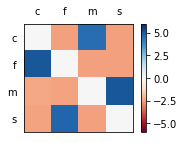

In [40]:
m.plot_norm_diff()

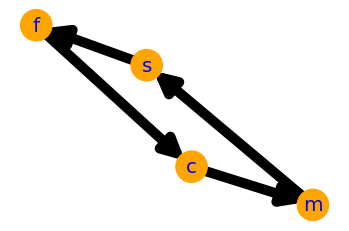

In [41]:
m.plot_graph()

## Idealized succession: more realistic

Often, we don't get a full succession. What if we randomly cut it short, but always return to 'm'?

In [42]:
succession = 'msfc'

data = ''
for _ in range(100):
    stop = np.random.randint(len(succession))
    data += succession[:stop+1]
    
data

'mmsfmsmmsmsmsfmsfcmsmsfcmsfmsmsfmsfmsmsfcmmsmsfmsmsmsmsfmmmsmmmsfmsfcmsfmsmsfmsfcmsfcmmsfmsfcmsmsmsmmsmmmsmsfcmsfmsfmsmsfmmmsmsfcmsfmsfcmsfcmsmsfmsfcmsfcmsfcmsmmsmmmmsfcmsfcmsmmsfcmmsmsmsmmsfmsfmmsfmsfmsmsmmsmmsfcmsfcmsmsfmsmsmmsmsfmsms'

In [43]:
m = Markov_chain.from_sequence(data, include_self=False)
m

Markov_chain(211 transitions, states=['c', 'f', 'm', 's'], step=1)

In [44]:
m.normalized_difference

array([[ 0. , -1.8,  3.9, -2.8],
       [ 9. ,  0. ,  0.7, -4.3],
       [-2.8, -4.3,  0. ,  4. ],
       [-2.8,  5. , -2.1,  0. ]])

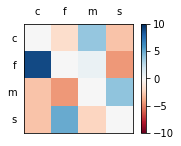

In [45]:
m.plot_norm_diff()

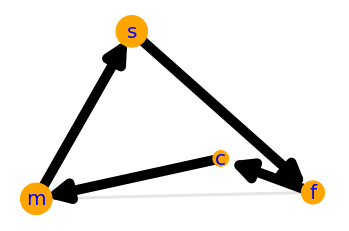

In [46]:
m.plot_graph()

So the 'correct' graph emerges.

## More realistic still

What if some of the transgressions are incomplete? (I.e. random start and end.)

In [47]:
np.set_printoptions(precision=3)

In [48]:
data = ''
l = len(succession)
for _ in range(100):
    start = np.random.randint(l)
    length = min(l-start, np.random.randint(l))
    data += succession[start:length+1]

data

'msffmsfmsssfcsfcsfcfffsfcsmsfmsfcmmmsfmsmsfmsfcfsfcfmsmsfmsfsfsfmssfmsfmmsffmsmsfsmfmsfmsmsmsmsmsmmsfmfmsfcsfmsfc'

In [49]:
m = Markov_chain.from_sequence(data, include_self=False)
m

Markov_chain(101 transitions, states=['c', 'f', 'm', 's'], step=1)

In [50]:
m.normalized_difference

array([[ 0.   ,  0.144, -0.92 ,  0.101],
       [ 4.153,  0.   ,  1.601, -2.875],
       [-1.457, -2.616,  0.   ,  3.052],
       [-1.845,  2.007, -1.251,  0.   ]])

In [51]:
m.chi_squared()

Chi2(chi2=56.2310540143378, crit=11.070497693516351, perc=0.9999999999271679)

In [52]:
print("Chi2(chi2=48.36996, crit=11.07050, perc=0.99999)")

Chi2(chi2=48.36996, crit=11.07050, perc=0.99999)


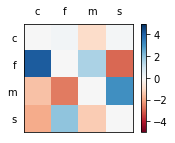

In [53]:
m.plot_norm_diff()

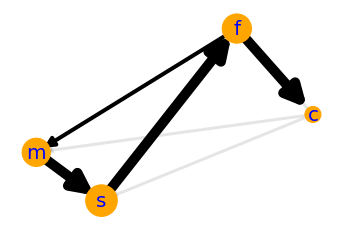

In [54]:
m.plot_graph()

## Example for Brian

Based on [this conversation](https://twitter.com/clasticdetritus/status/1120713140893777920). 

In [55]:
succession = ['sub', 'inter', 'supra']

In [56]:
data = 20 * succession

In [57]:
m = Markov_chain.from_sequence(data, strings_are_states=True, include_self=False)
m

Markov_chain(59 transitions, states=['inter', 'sub', 'supra'], step=1)

In [58]:
m.normalized_difference

array([[ 0.   , -3.19 ,  3.245],
       [ 3.246,  0.   , -3.029],
       [-3.189,  2.925,  0.   ]])

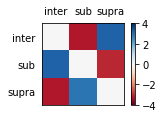

In [59]:
m.plot_norm_diff()

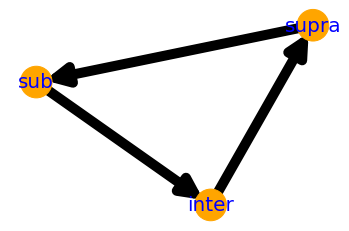

In [60]:
m.plot_graph()

In [61]:
data = []
l = len(succession)
for _ in range(40):
    start = np.random.randint(l)
    length = min(l-start, np.random.randint(l))
    data += succession[start:length+1]

In [62]:
data

['sub',
 'inter',
 'inter',
 'sub',
 'inter',
 'supra',
 'sub',
 'inter',
 'supra',
 'sub',
 'inter',
 'supra',
 'inter',
 'sub',
 'inter',
 'supra',
 'sub',
 'inter',
 'supra',
 'inter',
 'inter',
 'supra',
 'sub',
 'inter',
 'sub',
 'sub',
 'inter',
 'inter',
 'supra',
 'sub',
 'inter',
 'supra',
 'inter',
 'supra',
 'inter',
 'sub',
 'sub',
 'inter',
 'supra',
 'sub',
 'inter']

In [63]:
m = Markov_chain.from_sequence(data, strings_are_states=True, include_self=False)
m

Markov_chain(35 transitions, states=['inter', 'sub', 'supra'], step=1)

In [64]:
m.normalized_difference

array([[ 0.   , -1.385,  1.084],
       [ 1.46 ,  0.   , -1.701],
       [-1.101,  1.638,  0.   ]])

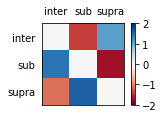

In [65]:
m.plot_norm_diff()

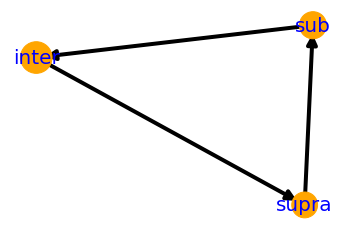

In [66]:
m.plot_graph()

----

&copy; Agile Scientific 2019, licensed CC-BY / Apache 2.0, please share this work